In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/tokenized_access_logs.csv
/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv
/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DescriptionDataCoSupplyChain.csv


In [2]:
import pandas as pd
import numpy as np 
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)

In [3]:
dataset = pd.read_csv('/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv', encoding="ISO-8859-1")
description = pd.read_csv('/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DescriptionDataCoSupplyChain.csv', encoding="ISO-8859-1")

# Data Introduction

In [4]:
dataset.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
description

,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer
5,Delivery Status,: Delivery status of orders: Advance shipping...
6,Late_delivery_risk,: Categorical variable that indicates if send...
7,Category Id,: Product category code
8,Category Name,: Description of the product category
9,Customer City,: City where the customer made the purchase


In [7]:
print(f"Dataset rows: {dataset.shape[0]}")
print(f"Dataset columns: {dataset.shape[1]}")

Dataset rows: 180519
Dataset columns: 53


# Preprocessing

In [8]:
modeling_columns = ['Type',
                  'Days for shipping (real)', 
                  'Days for shipment (scheduled)',
                  'Benefit per order',
                  'Sales per customer',
                  'Late_delivery_risk', 
                  'order date (DateOrders)',
                  'Order Item Discount',
                  'Order Item Discount Rate', 
                  'Order Item Product Price',
                  'Order Item Profit Ratio',
                  'Order Item Quantity', 
                  'Sales',                    
                  'Order Item Total',
                  'Order Profit Per Order',
                  'Product Price',
                  'shipping date (DateOrders)',
                  'Shipping Mode']

In [9]:
def drop_columns(dataset, columns_to_drop):
    dataset = dataset.drop(columns=columns_to_drop)
    print(f"{len(columns_to_drop)} columns dropped successfully. Number of columns remaining: {len(dataset.columns)}")
    return dataset

In [10]:
columns_to_drop = [col for col in dataset.columns if col not in modeling_columns]

dataset = drop_columns(dataset, columns_to_drop)

35 columns dropped successfully. Number of columns remaining: 18


In [11]:
dataset.head(10)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,0,1/31/2018 22:56,13.110000,0.04,327.75,0.29,1,327.75,314.640015,91.250000,327.75,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,1,1/13/2018 12:27,16.389999,0.05,327.75,-0.80,1,327.75,311.359985,-249.089996,327.75,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,0,1/13/2018 12:06,18.030001,0.06,327.75,-0.80,1,327.75,309.720001,-247.779999,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,0,1/13/2018 11:45,22.940001,0.07,327.75,0.08,1,327.75,304.809998,22.860001,327.75,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,0,1/13/2018 11:24,29.500000,0.09,327.75,0.45,1,327.75,298.250000,134.210007,327.75,1/15/2018 11:24,Standard Class
5,TRANSFER,6,4,18.580000,294.980011,0,1/13/2018 11:03,32.779999,0.10,327.75,0.06,1,327.75,294.980011,18.580000,327.75,1/19/2018 11:03,Standard Class
6,DEBIT,2,1,95.180000,288.420013,1,1/13/2018 10:42,39.330002,0.12,327.75,0.33,1,327.75,288.420013,95.180000,327.75,1/15/2018 10:42,First Class
7,TRANSFER,2,1,68.430000,285.140015,1,1/13/2018 10:21,42.610001,0.13,327.75,0.24,1,327.75,285.140015,68.430000,327.75,1/15/2018 10:21,First Class
8,CASH,3,2,133.720001,278.589996,1,1/13/2018 10:00,49.160000,0.15,327.75,0.48,1,327.75,278.589996,133.720001,327.75,1/16/2018 10:00,Second Class
9,CASH,2,1,132.149994,275.309998,1,1/13/2018 9:39,52.439999,0.16,327.75,0.48,1,327.75,275.309998,132.149994,327.75,1/15/2018 9:39,First Class


In [12]:
# check null values
dataset.isna().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Late_delivery_risk               0
order date (DateOrders)          0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Product Price                    0
shipping date (DateOrders)       0
Shipping Mode                    0
dtype: int64

In [13]:
dataset.duplicated().sum()

0

# Exploratory Data Analysis

In [14]:
dataset['Late_delivery_risk_name'] = dataset['Late_delivery_risk'].map({
    0: 'Late',
    1: 'Not late',
})

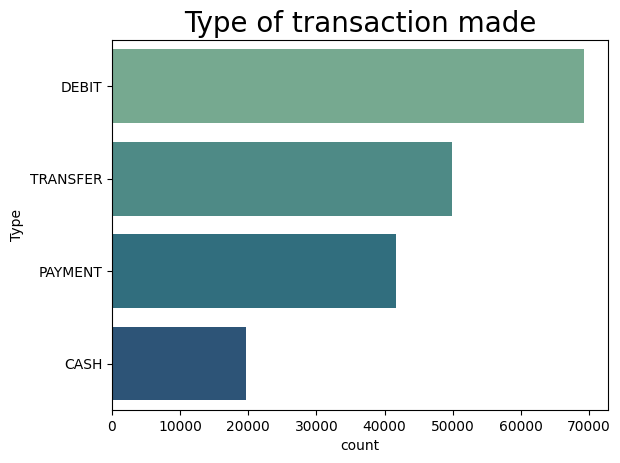

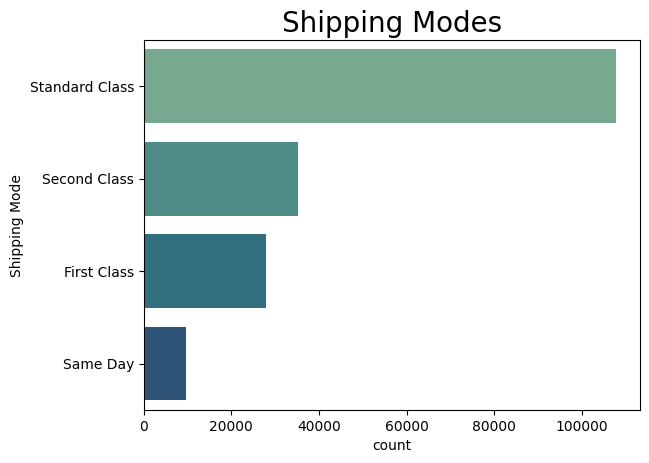

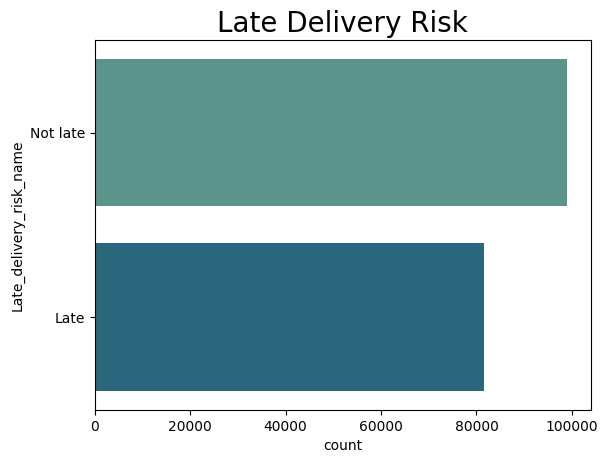

In [15]:
def bar_chart(category, title):
    sns.countplot(data = dataset, y = dataset[category],order= dataset[category].value_counts().index, palette='crest')
    plt.title(title, size = 20)
    plt.show()

bar_chart("Type","Type of transaction made")
bar_chart("Shipping Mode","Shipping Modes")
bar_chart("Late_delivery_risk_name","Late Delivery Risk")

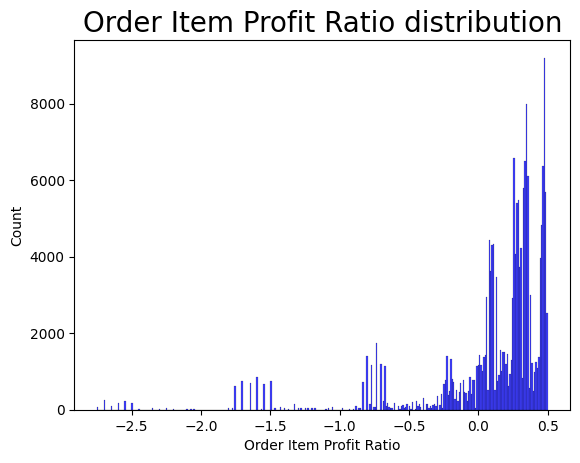

In [16]:
def quant_count(num_var, title):
    sns.histplot(dataset[num_var] ,kde=False,color = "Blue")
    plt.title(title, size = 20)
    plt.show()
    
quant_count("Order Item Profit Ratio", "Order Item Profit Ratio distribution")

In [17]:
dataset.drop('Late_delivery_risk_name', axis=1)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,0,1/31/2018 22:56,13.110000,0.04,327.750000,0.29,1,327.750000,314.640015,91.250000,327.750000,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,1,1/13/2018 12:27,16.389999,0.05,327.750000,-0.80,1,327.750000,311.359985,-249.089996,327.750000,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,0,1/13/2018 12:06,18.030001,0.06,327.750000,-0.80,1,327.750000,309.720001,-247.779999,327.750000,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,0,1/13/2018 11:45,22.940001,0.07,327.750000,0.08,1,327.750000,304.809998,22.860001,327.750000,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,0,1/13/2018 11:24,29.500000,0.09,327.750000,0.45,1,327.750000,298.250000,134.210007,327.750000,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,0,1/16/2016 3:40,0.000000,0.00,399.980011,0.10,1,399.980011,399.980011,40.000000,399.980011,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,1,1/16/2016 1:34,4.000000,0.01,399.980011,-1.55,1,399.980011,395.980011,-613.770019,399.980011,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,1,1/15/2016 21:00,8.000000,0.02,399.980011,0.36,1,399.980011,391.980011,141.110001,399.980011,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,0,1/15/2016 20:18,12.000000,0.03,399.980011,0.48,1,399.980011,387.980011,186.229996,399.980011,1/18/2016 20:18,Standard Class


# Feature Engineering

## Date Parsing

In [18]:
dataset['Order Year'] = pd.DatetimeIndex(dataset['order date (DateOrders)']).year
dataset['Order Month'] = pd.DatetimeIndex(dataset['order date (DateOrders)']).month
dataset['Order Day'] = pd.DatetimeIndex(dataset['order date (DateOrders)']).day
dataset['Order Day of Week'] = pd.DatetimeIndex(dataset['order date (DateOrders)']).dayofweek
dataset['Order Hour'] = pd.DatetimeIndex(dataset['order date (DateOrders)']).hour
dataset['Shipping Year'] = pd.DatetimeIndex(dataset['shipping date (DateOrders)']).year
dataset['Shipping Month'] = pd.DatetimeIndex(dataset['shipping date (DateOrders)']).month
dataset['Shipping Day'] = pd.DatetimeIndex(dataset['shipping date (DateOrders)']).day
dataset['Shipping Day of Week'] = pd.DatetimeIndex(dataset['shipping date (DateOrders)']).dayofweek
dataset['Shipping Hour'] = pd.DatetimeIndex(dataset['shipping date (DateOrders)']).hour

dataset.drop(columns = ['order date (DateOrders)', 'shipping date (DateOrders)'], inplace = True)

In [19]:
dataset.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price,Shipping Mode,Late_delivery_risk_name,Order Year,Order Month,Order Day,Order Day of Week,Order Hour,Shipping Year,Shipping Month,Shipping Day,Shipping Day of Week,Shipping Hour
0,DEBIT,3,4,91.250000,314.640015,0,13.110000,0.04,327.75,0.29,1,327.75,314.640015,91.250000,327.75,Standard Class,Late,2018,1,31,2,22,2018,2,3,5,22
1,TRANSFER,5,4,-249.089996,311.359985,1,16.389999,0.05,327.75,-0.80,1,327.75,311.359985,-249.089996,327.75,Standard Class,Not late,2018,1,13,5,12,2018,1,18,3,12
2,CASH,4,4,-247.779999,309.720001,0,18.030001,0.06,327.75,-0.80,1,327.75,309.720001,-247.779999,327.75,Standard Class,Late,2018,1,13,5,12,2018,1,17,2,12
3,DEBIT,3,4,22.860001,304.809998,0,22.940001,0.07,327.75,0.08,1,327.75,304.809998,22.860001,327.75,Standard Class,Late,2018,1,13,5,11,2018,1,16,1,11
4,PAYMENT,2,4,134.210007,298.250000,0,29.500000,0.09,327.75,0.45,1,327.75,298.250000,134.210007,327.75,Standard Class,Late,2018,1,13,5,11,2018,1,15,0,11


In [20]:
dataset['Shipping Day of Week Name'] = dataset['Shipping Day of Week'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

dataset['Order Day of Week Name'] = dataset['Order Day of Week'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

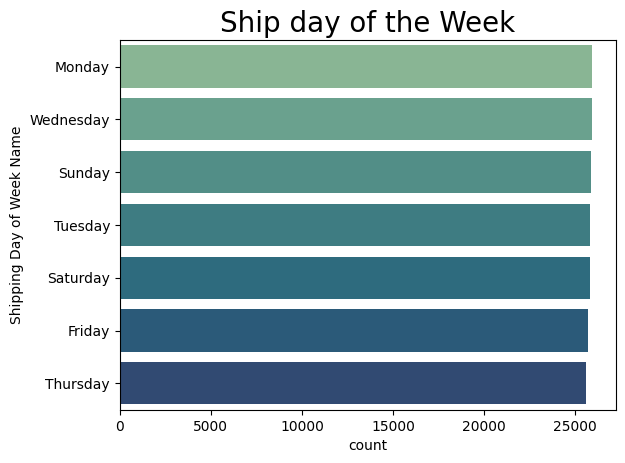

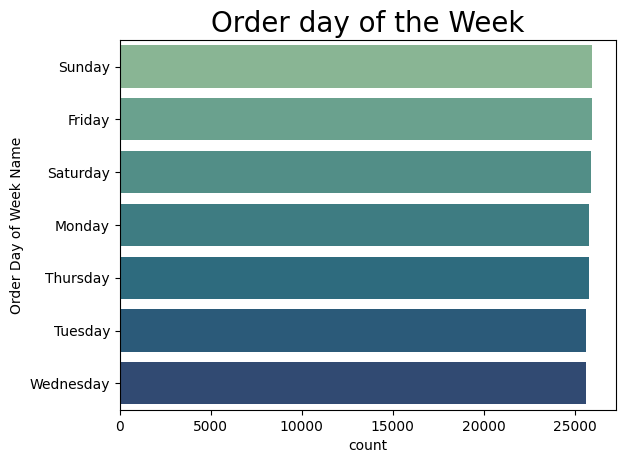

In [21]:
bar_chart("Shipping Day of Week Name","Ship day of the Week")
bar_chart("Order Day of Week Name","Order day of the Week")

In [22]:
dataset.drop(['Shipping Day of Week Name', 'Order Day of Week Name', 
           'Late_delivery_risk_name'
           ], axis=1, inplace=True)

## Categorical Encoding

In [23]:
dataset = pd.get_dummies(dataset)
print(dataset.shape)
dataset.head()

(180519, 32)


,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price,Order Year,Order Month,Order Day,Order Day of Week,Order Hour,Shipping Year,Shipping Month,Shipping Day,Shipping Day of Week,Shipping Hour,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,3,4,91.250000,314.640015,0,13.110000,0.04,327.75,0.29,1,327.75,314.640015,91.250000,327.75,2018,1,31,2,22,2018,2,3,5,22,False,True,False,False,False,False,False,True
1,5,4,-249.089996,311.359985,1,16.389999,0.05,327.75,-0.80,1,327.75,311.359985,-249.089996,327.75,2018,1,13,5,12,2018,1,18,3,12,False,False,False,True,False,False,False,True
2,4,4,-247.779999,309.720001,0,18.030001,0.06,327.75,-0.80,1,327.75,309.720001,-247.779999,327.75,2018,1,13,5,12,2018,1,17,2,12,True,False,False,False,False,False,False,True
3,3,4,22.860001,304.809998,0,22.940001,0.07,327.75,0.08,1,327.75,304.809998,22.860001,327.75,2018,1,13,5,11,2018,1,16,1,11,False,True,False,False,False,False,False,True
4,2,4,134.210007,298.250000,0,29.500000,0.09,327.75,0.45,1,327.75,298.250000,134.210007,327.75,2018,1,13,5,11,2018,1,15,0,11,False,False,True,False,False,False,False,True


In [24]:
dataset = dataset.astype({col: int for col in dataset.select_dtypes(include=['bool']).columns})
dataset.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price,Order Year,Order Month,Order Day,Order Day of Week,Order Hour,Shipping Year,Shipping Month,Shipping Day,Shipping Day of Week,Shipping Hour,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,3,4,91.250000,314.640015,0,13.110000,0.04,327.75,0.29,1,327.75,314.640015,91.250000,327.75,2018,1,31,2,22,2018,2,3,5,22,0,1,0,0,0,0,0,1
1,5,4,-249.089996,311.359985,1,16.389999,0.05,327.75,-0.80,1,327.75,311.359985,-249.089996,327.75,2018,1,13,5,12,2018,1,18,3,12,0,0,0,1,0,0,0,1
2,4,4,-247.779999,309.720001,0,18.030001,0.06,327.75,-0.80,1,327.75,309.720001,-247.779999,327.75,2018,1,13,5,12,2018,1,17,2,12,1,0,0,0,0,0,0,1
3,3,4,22.860001,304.809998,0,22.940001,0.07,327.75,0.08,1,327.75,304.809998,22.860001,327.75,2018,1,13,5,11,2018,1,16,1,11,0,1,0,0,0,0,0,1
4,2,4,134.210007,298.250000,0,29.500000,0.09,327.75,0.45,1,327.75,298.250000,134.210007,327.75,2018,1,13,5,11,2018,1,15,0,11,0,0,1,0,0,0,0,1


## Handle Outliers

In [25]:
float_cols = dataset.select_dtypes(include=['float']).columns

z_scores = np.abs(stats.zscore(dataset[float_cols]))

threshold = 3.0 

outlier_counts = {}

for col in float_cols:
    col_z_scores = np.abs(stats.zscore(dataset[col]))  # Compute Z-scores for the column
    outlier_counts[col] = (col_z_scores > threshold).sum()
    median_value = dataset[col].median()
    dataset.loc[col_z_scores > threshold, col] = median_value

print(outlier_counts)

{'Benefit per order': 3608, 'Sales per customer': 477, 'Order Item Discount': 2106, 'Order Item Discount Rate': 0, 'Order Item Product Price': 488, 'Order Item Profit Ratio': 6013, 'Sales': 467, 'Order Item Total': 477, 'Order Profit Per Order': 3608, 'Product Price': 488}


## Normalization

In [26]:
dataset[float_cols] = (dataset[float_cols] - dataset[float_cols].min()) / (dataset[float_cols].max() - dataset[float_cols].min())
dataset.head(10)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price,Order Year,Order Month,Order Day,Order Day of Week,Order Hour,Shipping Year,Shipping Month,Shipping Day,Shipping Day of Week,Shipping Hour,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,3,4,0.614174,0.576808,0,0.153351,0.16,0.608048,0.880000,1,0.538576,0.576808,0.614174,0.608048,2018,1,31,2,22,2018,2,3,5,22,0,1,0,0,0,0,0,1
1,5,4,0.067610,0.570648,1,0.191718,0.20,0.608048,0.257143,1,0.538576,0.570648,0.067610,0.608048,2018,1,13,5,12,2018,1,18,3,12,0,0,0,1,0,0,0,1
2,4,4,0.069714,0.567568,0,0.210902,0.24,0.608048,0.257143,1,0.538576,0.567568,0.069714,0.608048,2018,1,13,5,12,2018,1,17,2,12,1,0,0,0,0,0,0,1
3,3,4,0.504344,0.558347,0,0.268335,0.28,0.608048,0.760000,1,0.538576,0.558347,0.504344,0.608048,2018,1,13,5,11,2018,1,16,1,11,0,1,0,0,0,0,0,1
4,2,4,0.683165,0.546028,0,0.345070,0.36,0.608048,0.971429,1,0.538576,0.546028,0.683165,0.608048,2018,1,13,5,11,2018,1,15,0,11,0,0,1,0,0,0,0,1
5,6,4,0.497471,0.539887,0,0.383437,0.40,0.608048,0.748571,1,0.538576,0.539887,0.497471,0.608048,2018,1,13,5,11,2018,1,19,4,11,0,0,0,1,0,0,0,1
6,2,1,0.620485,0.527568,1,0.460054,0.48,0.608048,0.902857,1,0.538576,0.527568,0.620485,0.608048,2018,1,13,5,10,2018,1,15,0,10,0,1,0,0,1,0,0,0
7,2,1,0.577527,0.521408,1,0.498421,0.52,0.608048,0.851429,1,0.538576,0.521408,0.577527,0.608048,2018,1,13,5,10,2018,1,15,0,10,0,0,0,1,1,0,0,0
8,3,2,0.682378,0.509108,1,0.575038,0.60,0.608048,0.988571,1,0.538576,0.509108,0.682378,0.608048,2018,1,13,5,10,2018,1,16,1,10,1,0,0,0,0,0,1,0
9,2,1,0.679857,0.502948,1,0.613405,0.64,0.608048,0.988571,1,0.538576,0.502948,0.679857,0.608048,2018,1,13,5,9,2018,1,15,0,9,1,0,0,0,1,0,0,0


# Model Training and Evaluation

In [27]:
X = dataset.drop('Late_delivery_risk', axis=1)
y = dataset['Late_delivery_risk']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Compare multiple models performance

In [29]:
!pip install AutoLogging_ML
from AutoLogging_ML import AutoLogger

log, model = AutoLogger.train_and_log_classification(X_train,y_train,X_test,y_test,size='large')

In [30]:
log

,model,training-accuracy,training-precision,training-recall,training-f1,training-confusion matrix,validation-accuracy,validation-precision,validation-recall,validation-f1,validation-confusion matrix,training-classification report,validation-classification report
10,quadratic discriminant analysis,58.313887,78.344998,53.859168,43.398329,"[[5040, 60195], [6, 79174]]",58.353645,78.377937,53.897640,43.473322,"[[1272, 15035], [1, 19796]]",precision recall f1-score ...,precision recall f1-score ...
0,naive bayes,69.817540,73.308507,71.451765,69.511150,"[[57652, 7583], [36005, 43175]]",69.407822,72.909809,71.051942,69.089997,"[[14360, 1947], [9098, 10699]]",precision recall f1-score ...,precision recall f1-score ...
3,adaboost,96.134058,96.135463,96.056838,96.094413,"[[62141, 3094], [2489, 76691]]",96.061378,96.071536,95.973958,96.020120,"[[15503, 804], [618, 19179]]",precision recall f1-score ...,precision recall f1-score ...
9,linear discriminant analysis,96.846588,96.969998,96.683271,96.807770,"[[61968, 3267], [1287, 77893]]",96.742743,96.875811,96.570400,96.701977,"[[15457, 850], [326, 19471]]",precision recall f1-score ...,precision recall f1-score ...
1,decision tree,100.000000,100.000000,100.000000,100.000000,"[[65235, 0], [0, 79180]]",97.080656,97.049343,97.057444,97.053374,"[[15788, 519], [535, 19262]]",precision recall f1-score ...,precision recall f1-score ...
4,gradient boost,97.567427,97.875878,97.307427,97.531351,"[[61722, 3513], [0, 79180]]",97.485043,97.807293,97.215920,97.447162,"[[15399, 908], [0, 19797]]",precision recall f1-score ...,precision recall f1-score ...
6,logistic regression,97.566042,97.874720,97.305894,97.529937,"[[61720, 3515], [0, 79180]]",97.485043,97.807293,97.215920,97.447162,"[[15399, 908], [0, 19797]]",precision recall f1-score ...,precision recall f1-score ...
5,xgboost,98.263338,98.463112,98.078799,98.240545,"[[62735, 2500], [8, 79172]]",97.573676,97.849092,97.331334,97.538731,"[[15463, 844], [32, 19765]]",precision recall f1-score ...,precision recall f1-score ...
2,random forest,100.000000,100.000000,100.000000,100.000000,"[[65235, 0], [0, 79180]]",97.598604,97.894015,97.345957,97.563379,"[[15448, 859], [8, 19789]]",precision recall f1-score ...,precision recall f1-score ...
7,bagging classifier,99.922446,99.927713,99.915776,99.921706,"[[65135, 100], [12, 79168]]",97.659539,97.822498,97.485844,97.629698,"[[15604, 703], [142, 19655]]",precision recall f1-score ...,precision recall f1-score ...


## The Best Performing Model

In [31]:
model

ExtraTreesClassifier()

## Compare Accuracy of Models

In [32]:
log[["model", "validation-accuracy"]]

,model,validation-accuracy
10,quadratic discriminant analysis,58.353645
0,naive bayes,69.407822
3,adaboost,96.061378
9,linear discriminant analysis,96.742743
1,decision tree,97.080656
4,gradient boost,97.485043
6,logistic regression,97.485043
5,xgboost,97.573676
2,random forest,97.598604
7,bagging classifier,97.659539


<Axes: xlabel='validation-accuracy', ylabel='model'>

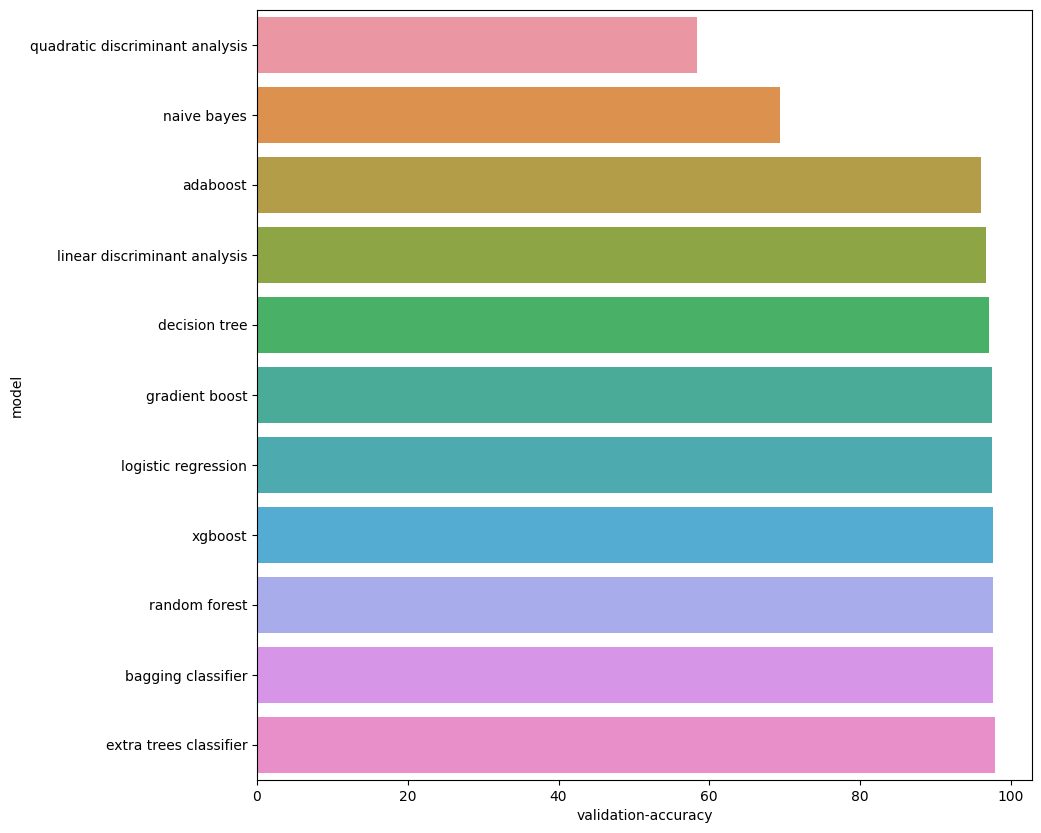

In [33]:
AutoLogger.get_metric_plot_classification(log,'validation','accuracy')

## Compute Log Loss from the Highest Performing Model

In [34]:
from sklearn.metrics import log_loss

y_proba = model.predict_proba(X_test)

# Compute log loss
loss = log_loss(y_test, y_proba)
print(f'Log Loss: {loss:.4f}')

Log Loss: 0.0821
